In [1]:
import numpy as np
import pandas as pd
import matplotlib
# %matplotlib notebook
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
linmod = LinearRegression()

In [2]:
datafile = '../../dataset/ch09/movie_profits.txt'
movie_profits = pd.read_csv(datafile, sep='\t')

In [3]:
movie_profits.head()

,Year,Movie,US Gross ($M),Budget ($M),Run Time (min),Critic Score (Rotten Tomatoes)
0,2012,Django Unchained,162.805434,100.0,165,88
1,2012,Parental Guidance,77.264926,25.0,105,18
2,2012,The Impossible,19.019882,40.0,114,81
3,2012,Jack Reacher,80.070736,60.0,130,61
4,2012,This is 40,67.544505,35.0,134,51


**Problem 3. Movie profits What can predict how much a motion picture will make? We have data on 609 recent releases that includes the USGross (in $M), the Budget ($M), the Run Time (minutes), and the score given by the critics on the Rotten Tomatoes website. The first several entries in the data table look like this:We want a regression model to predict USGross. Parts of the regression output computed in Excel look like this:**

**a) Write the multiple regression equation.**

**Answer:** $\hat{US_Gross} = - 52.3692 + 0.9723\times Budget$ + 0.3872\times Run_time$ + 0.6403\times Critic_Score$

**b) What is the interpretation of the coefficient of Budget in this
regression model?**

**Answer:** The coefficient of Budget are intercepting with other preditors(Run Time and Critic Score) in the regression.  If we consider the movies with a given amount of Run Time and Critic Score, those that add more fund to the budget then the box office of the US Gross may have more in returns.

**Problem 4. Movie profits again A middle manager at an entertainment
company, upon seeing the analysis of Exercise 3, concludes that longer movies make more money. He argues that his company’s films should all be padded by 30 minutes to improve their gross. Explain the flaw in his interpretation of this model.**


**Answer:** The regression includes three preditors (Budget, Run Time and Critic Score).  If we consider the movies with a equal given amount of Budget and a same given amount of Critic Score, and add more time to the Run Time may result a higher US Gross box office.

**Problem 5. More movies profits For the movies examined in Exercise 3, here is a scatterplot of USGross vs. Budget:**

In [4]:
x = movie_profits['Budget ($M)']
y = movie_profits['US Gross ($M)']

In [5]:
x = np.array(x).reshape(-1, 1)
linmod.fit(x, y);
y_hat = linmod.predict(x)
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 46.7%


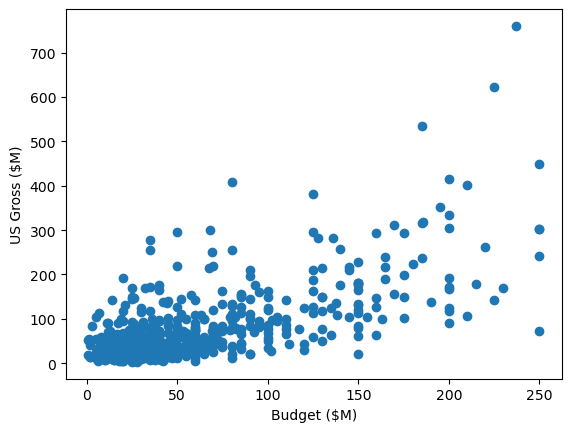

In [6]:
plt.figure()
plt.scatter(x, y)
plt.xlabel('Budget ($M)')
plt.ylabel('US Gross ($M)');

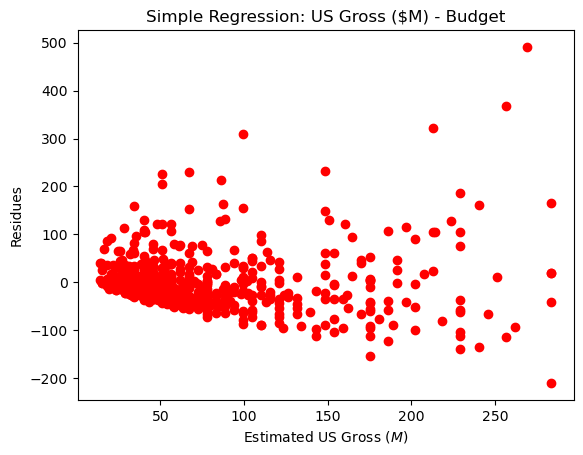

In [7]:
residues = y - y_hat
plt.scatter(y_hat, residues, color='r');
plt.xlabel('Estimated US Gross ($M)$')
plt.ylabel('Residues')
plt.title('Simple Regression: US Gross ($M) - Budget');

**a) Linearity condition**

**Answer:** (1) it is not straight enough in the plot that there is a bend in it, (2) its residual plot thickens and (3) it may have outlier(s) that should be reexamined or removed.

**b) Equal Spread condition**

**Answer:** the plot of residuals against predicted values is thickening. In addition, some residuals seem unusually large and could deserve more attention.

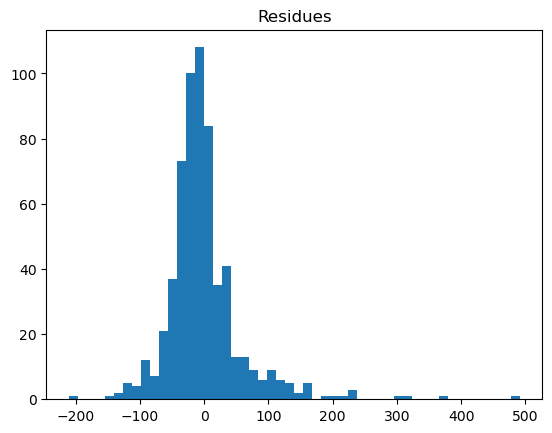

In [8]:
x = movie_profits['Budget ($M)']
y = movie_profits['US Gross ($M)']
x = np.array(x).reshape(-1, 1)
linmod.fit(x, y);
y_hat = linmod.predict(x)
r = linmod.score(x, y)


residues = y - y_hat
plt.hist(residues, bins = 50)
plt.title("Residues");

**c) Normality assumption**

**Answer:** the histogram of the residuals of the distribution is unimodal, however, it is not symmetric and with obvious outliers.

**Problem 6. Movie residuals For the movies regression in Exercise 3, here is a histogram of the residuals. What does it tell us about the Assumptions and Conditions below?**

In [9]:
x = movie_profits[ ['Budget ($M)', 'Run Time (min)', 'Critic Score (Rotten Tomatoes)'] ]
y = movie_profits['US Gross ($M)']

In [10]:
linmod.fit(x, y);
y_hat = linmod.predict(x)
residues = y - y_hat
r = linmod.score(x, y)
print(f'R_squared: {r * 100:.1f}%')

R_squared: 51.7%


In [11]:
print(f'Budget ($M) coef: {linmod.coef_[0]:.4f}')
print(f'Run Time (min) coef: {linmod.coef_[1]:.4f}')
print(f'Critic Score (Rotten Tomatoes) coef: {linmod.coef_[1]:.4f}')

Budget ($M) coef: 0.9723
Run Time (min) coef: 0.3872
Critic Score (Rotten Tomatoes) coef: 0.3872


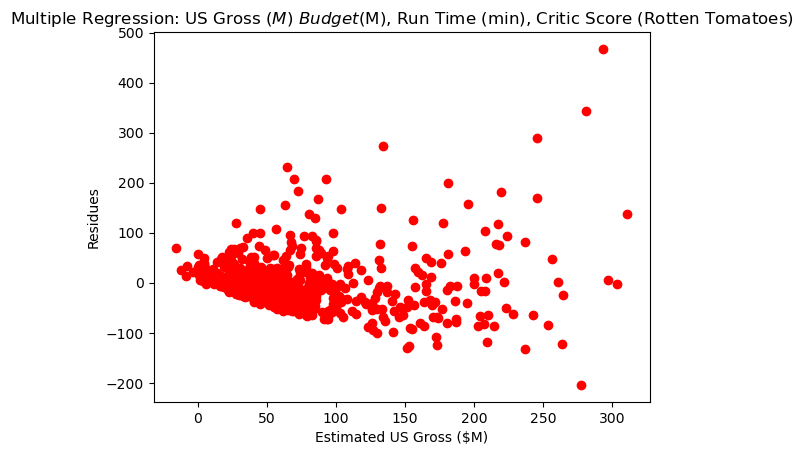

In [12]:
plt.figure()
plt.scatter(y_hat, residues, color='r');
plt.xlabel('Estimated US Gross ($M)')
plt.ylabel('Residues')
plt.title('Multiple Regression: US Gross ($M) ~ Budget ($M), Run Time (min), Critic Score (Rotten Tomatoes)');

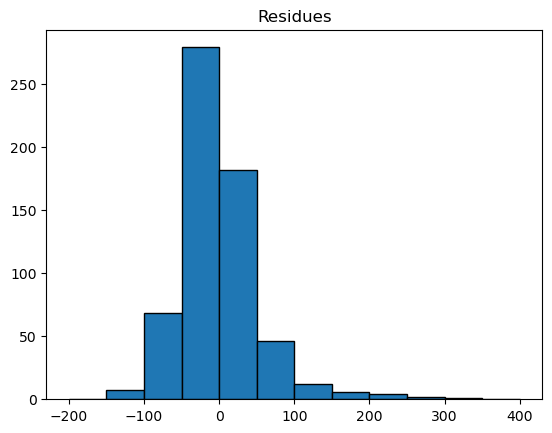

In [13]:
plt.hist(residues, bins=np.linspace(-200, 400, 13), edgecolor='k')
plt.title("Residues");

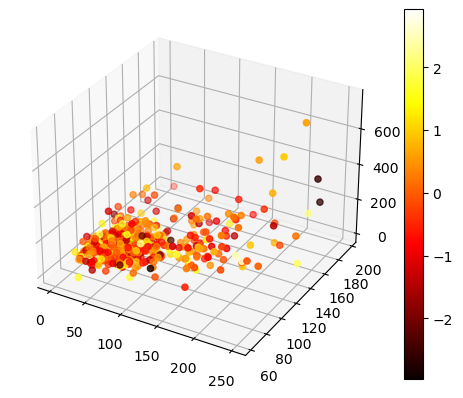

In [14]:
#%matplotlib notebook
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.array(movie_profits['Budget ($M)'])
y = np.array(movie_profits['Run Time (min)'])
z = np.array(movie_profits['US Gross ($M)'])

a = movie_profits['Critic Score (Rotten Tomatoes)']

colors = np.random.standard_normal(len(a))
img = ax.scatter(x, y, z, c=colors, cmap=plt.hot())
fig.colorbar(img)
plt.show()

**a) Linearity condition**

**Answer:** the scatterplot is not straight enought and with obvious outliers.  In addition, the residual plot shows thickening pattern and the the residuals do not have a consistent spread. The residual plot of the data does not show a consistent satisfaction of the linearity condition. 

**b) Nearly Normal condition**

**Answer:** the histogram of the residuals of the distribution is unimodal, however, it is not symmetric and with obvious outliers.

**c) Equal Spread condition**

**Answer:** the plot of residuals against estimated US gross ($M) is thickening. Some of the residuals seem unusually large and could deserve more attention.

**Problem 7. Movie profits once more Look back at the regression in Exercise 3. Here is the partial regression plot for the coefficient of Budget.**

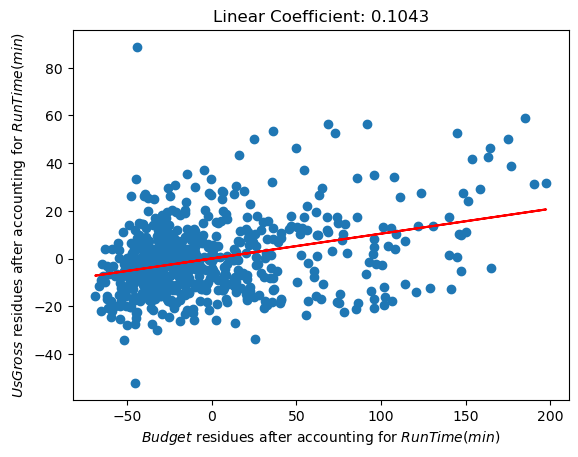

In [28]:
linmod.fit(np.array(movie_profits['Run Time (min)']).reshape(-1, 1), y)
gross_residues_1 = y - linmod.predict(np.array(movie_profits['Run Time (min)']).reshape(-1, 1))

linmod.fit(np.array(movie_profits['Critic Score (Rotten Tomatoes)']).reshape(-1, 1), y)
gross_residues_2 = y - linmod.predict(np.array(movie_profits['Critic Score (Rotten Tomatoes)']).reshape(-1, 1))

linmod.fit(np.array(movie_profits['Run Time (min)']).reshape(-1, 1), movie_profits['Budget ($M)'])
linmod.fit(np.array(movie_profits['Critic Score (Rotten Tomatoes)']).reshape(-1, 1), movie_profits['Budget ($M)'])
budget_residues_1 = movie_profits['Budget ($M)'] - linmod.predict(np.array(movie_profits['Run Time (min)']).reshape(-1, 1))
budget_residues_2 = movie_profits['Budget ($M)'] - linmod.predict(np.array(movie_profits['Critic Score (Rotten Tomatoes)']).reshape(-1, 1))


plt.scatter(budget_residues_2, gross_residues_2)
plt.ylabel('$UsGross$ residues after accounting for $Run Time (min)$')
plt.xlabel('$Budget$ residues after accounting for $Run Time (min)$')
                 
linmod.fit(np.array(budget_residues_2).reshape(-1,1), gross_residues_2)
plt.title(f'Linear Coefficient: {linmod.coef_[0]:.4f}')
plt.plot(budget_residues_2, linmod.predict(np.array(budget_residues_2).reshape(-1,1)), 'r');

In [22]:
sm.graphics.plot_partregress(y, 'Budget ($M)', ['Run Time (min)'], ['Critic Score (Rotten Tomatoes)'], 
                             data=movie_profits,
                             obs_labels=False);

TypeError: plot_partregress() got multiple values for argument 'data'